### Problem solving exercise

+ Because I love burritos we're analyzing a chipotle dataset! 

+ The goal is to string together the skills we've worked on over the last few months

#### RULES

+ I will not be giving out answers! (ok maybe some hints if you get *really* stuck) 
+ You will solve this together as a class
+ When someone figures something out, they can come to the board and present their solution to the class
    + Alternative solutions can also be presented
    
##### REWARDS:
+ There will be a happy hour after this class
+ Students with the most accurate models will be eligible to vote on the bar we go to!
    + Any models with accuracy within a 5% of the most accurate model  
    + So if the best model is 82.2%, we'll also select anyone with accuracy greater than 78.1%
+ Student who presents the most solutions presented to the class will get a free drink! (or alternative if you don't drink) 
    + No ties! Only one student can win this!


### Outline:

#### Cleaning Data

+ We only briefly covered cleaning data
+ You'll need to rely more on google and logic than class notes here
+ Cleaning data is something you just need to learn by doing
+ After cleaning, we'll run a machine learning algorithm to predict the price of an order

#### Preprocessing & ML 

+ We've covered this in class, but this time you're really driving the ship
+ Get your data into the right format, then start training your algorithm! 



### That's it! GO FOR IT! 
+ I believe in all of you!

### First import your dataset

+ hint - examine how the values are separated 
+ What's the difference between a tsv and csv?


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("chipotle.tsv", error_bad_lines=False, delimiter='\t')

## Next, clean up "choice description"

+ What do the values look like? 
+ We're going to plug this into count vectorizer, later
+ How can we clean this up?

+ Check out a package called "re" for regular expressions
+ there are multiple ways to solve this problem

In [ ]:
import re
# re.findall in a lambda expression

In [3]:
holder = []
for x in df["choice_description"]:
    if type(x) == float:
        holder.append(str(x))
    else:
        holder.append(x)
        
df["choice_description"] = holder
df["choice_description"] = df["choice_description"].apply(lambda x: x.replace("[", "").replace("]", ""))

holder = []
for x in df["choice_description"]:
    if x == "nan":
        holder.append(np.nan)
    else:
        holder.append(x)
        
df["choice_description"] = holder

In [4]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,Clementine,$3.39
2,1,1,Nantucket Nectar,Apple,$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"Tomatillo-Red Chili Salsa (Hot), Black Beans, ...",$16.98


### Next, clean up "item price" 

+ What can you do here? 
+ This will be our outcome variable
+ How can we make this easier to read? 

In [5]:
df["item_price"] = df["item_price"].apply(lambda x: float(x.replace("$", "")))

In [10]:
choiceNumber = []
for x in df["choice_description"]:
    if pd.isnull(x):
        choiceNumber.append(0)
    else:
        choiceNumber.append(len(x.split(",")))
    
df["Choice Number"] = choiceNumber

In [11]:
df["Choice Number"].value_counts()

0     1246
5      757
6      724
1      549
4      451
7      431
3      200
8      130
2       85
9       45
10       4
Name: Choice Number, dtype: int64

In [22]:
for x in df["choice_description"][:10]:
    if pd.isnull(x):
        pass
    else:
        number = len(x.split(","))
        things = x.split(",")
        for y in range(number):
            print(things[y])
    print("--------")
        

--------
Clementine
--------
Apple
--------
--------
Tomatillo-Red Chili Salsa (Hot)
 Black Beans
 Rice
 Cheese
 Sour Cream
--------
Fresh Tomato Salsa (Mild)
 Rice
 Cheese
 Sour Cream
 Guacamole
 Lettuce
--------
--------
Tomatillo Red Chili Salsa
 Fajita Vegetables
 Black Beans
 Pinto Beans
 Cheese
 Sour Cream
 Guacamole
 Lettuce
--------
Tomatillo Green Chili Salsa
 Pinto Beans
 Cheese
 Sour Cream
 Lettuce
--------
Fresh Tomato Salsa
 Rice
 Black Beans
 Pinto Beans
 Cheese
 Sour Cream
 Lettuce
--------


### Now Preprocess your data! 

+ Use a vectorizer of your choice!

+ Consider a dimension reduction technique! 

    + PCA? SVD? LDA?

In [71]:
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from sklearn.decomposition import NMF, LatentDirichletAllocation

n_sample = len(df["item_name"])
n_topics = 10
n_features = 50

tf_vectorizer = CountVectorizer(max_df = .99, min_df = 1,
                                max_features=n_features,
                                stop_words='english')

tf = tf_vectorizer.fit_transform(df["item_name"].dropna())


lda = LatentDirichletAllocation(n_topics = n_topics, max_iter = 5,
                                learning_method='online',
                                learning_offset = 50.,
                                random_state=0)

lda.fit(tf)

itemVect = pd.DataFrame(tf.A, columns = [tf_vectorizer.get_feature_names()])

In [72]:
itemVect.head()

,barbacoa,bottled,bowl,burrito,canned,carnitas,chicken,chili,chips,corn,...,salad,salsa,soda,soft,steak,tacos,tomatillo,tomato,veggie,water
0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
np.shape(itemVect)

(4622, 32)

In [74]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, 20)


Topics in LDA model:
Topic #0:
bowl chicken veggie barbacoa guacamole chips steak carnitas burrito tacos soft nantucket nectar salad crispy mild red roasted green water
Topic #1:
chips salsa chili tomatillo green red roasted corn tomato fresh soft chicken steak tacos bowl pack mild water guacamole carnitas
Topic #2:
soft tacos chicken nantucket nectar drink steak carnitas barbacoa bowl pack canned veggie chili bottled izze corn fresh water guacamole
Topic #3:
soft drink pack izze tomatillo guacamole nectar soda bottled chicken canned fresh water salad corn red tomato salsa green nantucket
Topic #4:
steak burrito bowl tacos chips soft salsa crispy fresh green chili tomatillo tomato water nantucket mild corn pack guacamole carnitas
Topic #5:
burrito chicken veggie barbacoa bowl salad chips carnitas tacos soft bottled pack tomato mild corn drink soda roasted salsa fresh
Topic #6:
salad tacos crispy chicken barbacoa veggie bowl bottled water steak carnitas mild soda izze nantucket pack co

In [82]:
n_sample = len(df["choice_description"])
n_topics = 10
n_features = 50

tf_vectorizer2 = CountVectorizer(max_df = .99, min_df = 1,
                                max_features=n_features,
                                stop_words='english')

tf2 = tf_vectorizer2.fit_transform(df["choice_description"].fillna(""))


lda2 = LatentDirichletAllocation(n_topics = n_topics, max_iter = 5,
                                learning_method='online',
                                learning_offset = 50.,
                                random_state=0)

lda2.fit(tf2)

choiceVect = pd.DataFrame(tf2.A, columns = [tf_vectorizer2.get_feature_names()])

In [83]:
choiceVect.head()

,adobo,apple,banana,beans,black,blackberry,cheese,chicken,chili,cilantro,...,rice,roasted,salsa,sour,sprite,tomatillo,tomato,vegetables,veggies,white
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,0,1,0,1,0,...,1,0,1,1,0,1,0,0,0,0


In [84]:
np.shape(choiceVect)

(4622, 50)

In [85]:
print("\nTopics in LDA model:")
tf_feature_names2 = tf_vectorizer2.get_feature_names()
print_top_words(lda2, tf_feature_names2, 20)


Topics in LDA model:
Topic #0:
corn roasted salsa chili rice cheese beans sour cream lettuce black guacamole medium blackberry pinto tomatillo fresh tomato green mild
Topic #1:
sprite nestea apple beans chili salsa lettuce tomatillo black red fajita cream hot veggies medium rice sour green guacamole roasted
Topic #2:
tomatillo chili salsa green rice cheese beans cream sour guacamole lettuce pinto black medium fajita veggies roasted corn hot red
Topic #3:
red tomatillo salsa chili cheese rice beans lettuce sour cream black hot pinto coca cola guacamole green fresh tomato fajita
Topic #4:
salsa fajita veggies chili medium rice corn roasted lettuce tomatillo hot beans red cheese pinto black cream sour guacamole vegetables
Topic #5:
fresh tomato salsa mild rice cheese beans sour cream lettuce pinto black veggies fajita guacamole chili medium tomatillo hot red
Topic #6:
fajita vegetables guacamole lettuce salsa chili beans rice cheese black cream sour pinto tomatillo green red tomato fresh

In [86]:
np.shape(choiceVect)

(4622, 50)

In [87]:
ldaColumns = itemVect.join(choiceVect, lsuffix = "item_", rsuffix = "choice_")

In [88]:
test = df.join(ldaColumns)
test.drop(["item_name", "choice_description"], axis = 1, inplace = True)

In [89]:
X = test.drop("item_price", axis = 1)
y = test["item_price"]

In [90]:
X

,order_id,quantity,Choice Number,barbacoa,bottled,bowl,burrito,canned,carnitas,chickenitem_,...,rice,roastedchoice_,salsachoice_,sour,sprite,tomatillochoice_,tomatochoice_,vegetables,veggies,white
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,5,0,0,1,0,0,0,1,...,1,0,1,1,0,1,0,0,0,0
5,3,1,6,0,0,1,0,0,0,1,...,1,0,1,1,0,0,1,0,0,0
6,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,4,1,8,0,0,0,1,0,0,0,...,0,0,1,1,0,1,0,1,0,0
8,4,1,5,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
9,5,1,7,0,0,0,1,0,0,0,...,1,0,1,1,0,0,1,0,0,0


Percentage of Variance Explained:  [  9.99949955e-01   3.34993895e-05   2.39397652e-06   1.25321051e-06
   1.14476003e-06]


(0, 1)

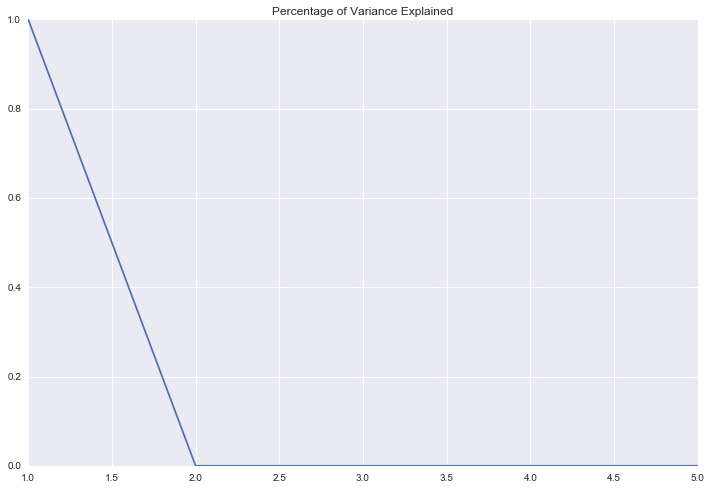

In [109]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 5)
X_pca = pca.fit_transform(X)
print("Percentage of Variance Explained: ", pca.explained_variance_ratio_)
variance = pca.explained_variance_ratio_.tolist()

plt.figure(figsize = (12,8))
plt.plot(pd.DataFrame(data = variance, index = np.arange(1,6).tolist(), columns = ["Variance"]))
plt.title("Percentage of Variance Explained")
plt.ylim(0,1)

In [116]:
pca = decomposition.PCA(n_components = 2)
X_pca = pca.fit_transform(X)

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3)

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation
from sklearn.model_selection import GridSearchCV

In [120]:
lr = LinearRegression()
lr.fit(X_train,y_train.reshape(len(y_train),1))

print("R Squared: ", lr.score(X_test,y_test.reshape(len(y_test),1)))
print("Coefficient: ", lr.coef_)
print("Y Intercept: ", lr.intercept_)

R Squared:  0.575531566157
Coefficient:  [[  5.16121759e-05   1.09214300e+00]]
Y Intercept:  [ 7.5017931]


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [128]:
from sklearn.linear_model import Ridge
kf = cross_validation.KFold(len(X_pca), n_folds = 5)
gs = GridSearchCV(estimator = Ridge(), param_grid = {"alpha": np.logspace(-10, 10, 21), "normalize": [True, False]}
                  , cv = kf, scoring='neg_mean_squared_error')

gs = gs.fit(X_pca, y.reshape(len(y),1))
algo = gs.best_estimator_ 

# print("MSE: ", mean_squared_error(y, algo.predict(X.reshape(len(X),1))))
print("R Squared: ", algo.score(X_pca, y.reshape(len(y),1)))
print("Coefficient: ", algo.coef_)
print("Y Intercept: ", algo.intercept_)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


R Squared:  0.591178569639
Coefficient:  [[  1.29853226e-05   1.06623841e+00]]
Y Intercept:  [ 7.46433579]


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [129]:
gs.best_estimator_

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [124]:
np.shape(X_pca)

(4622, 2)

In [125]:
np.shape(y)

(4622,)

### Now train your model! 
+ What model you select is up to you
+ check out sklearn documentation!

In [122]:
y

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
5       10.98
6        1.69
7       11.75
8        9.25
9        9.25
10       4.45
11       8.75
12       8.75
13      11.25
14       4.45
15       2.39
16       8.49
17       8.49
18       2.18
19       8.75
20       4.45
21       8.99
22       3.39
23      10.98
24       3.39
25       2.39
26       8.49
27       8.99
28       1.09
29       8.49
        ...  
4592    11.75
4593    11.75
4594    11.75
4595     8.75
4596     4.45
4597     1.25
4598     1.50
4599     8.75
4600     4.45
4601     1.25
4602     9.25
4603     9.25
4604     8.75
4605     4.45
4606     1.25
4607    11.75
4608    11.25
4609     1.25
4610    11.75
4611    11.25
4612     9.25
4613     2.15
4614     1.50
4615     8.75
4616     4.45
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, dtype: float64

In [ ]:
### code here

### Now test your model!

In [ ]:
### code here

In [ ]:
### code here